In [8]:
import math as ma
# import seabird
# from seabird.cnv import fCNV
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os
import gsw
import cmocean
from scipy import signal
import matplotlib.gridspec as gridspec
from matplotlib.colors import SymLogNorm
import os
import csv
from mpl_toolkits.basemap import Basemap
from scipy import interpolate

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py:1143: RuntimeWarning: invalid value encountered in ct_from_t
  return _gsw_ufuncs.ct_from_t(SA, t, p)


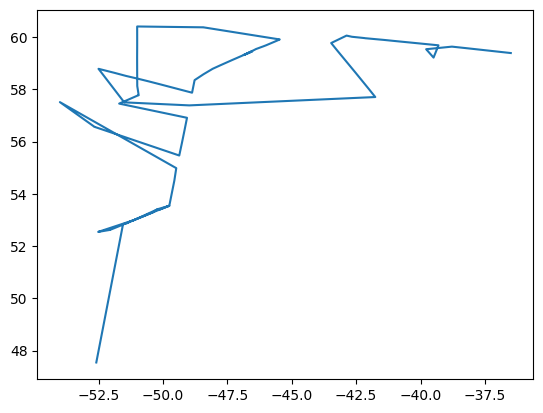

In [2]:
#CTD Data
name = '/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw/MSM74_CTD.tab'
file = open(name,'r')
lignes = file.readlines()
lon_CTD = np.zeros((1,115))[0]
lat_CTD = np.zeros((1,115))[0]
lon_CTD[0] = -52.586630
lat_CTD[0] = 47.546640
lon_CTD[87] = -43.041740
lat_CTD[87] = 59.258640
lon_CTD[-1] = -36.102990
lat_CTD[-1] = 59.342640

for i in range(13,127) :
    li = lignes[i]
    if i<17 :
        lat = float(li[22:33])
        lon = float(li[45:57])
    if (i>=17) & (i<99) :
        lat = float(li[23:34])
        lon = float(li[46:58])
    if (i>=100) & (i<126) :
        lat = float(li[24:35])
        lon = float(li[47:59])
    lon_CTD[i-12] = lon
    lat_CTD[i-12] = lat

plt.plot(lon_CTD,lat_CTD)

#0 : P[dbar]  4 : sigma0[kg/m3]
#1 : Z[m]     5 : O2 [mumol/kg]
#2 : T[°C]   
#3 : S[psu] 
p = []
z = []
t = []
s = []
O2 = []
VAR = np.zeros((6,115,3800))
VAR[:] = np.nan
with open('/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw/MSM74_CTD_2.tab') as csvfile :
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV :
        p.append(float(row[2]))
        z.append(-float(row[3]))
        t.append(float(row[4]))
        s.append(float(row[5]))
        O2.append(float(row[6]))

ind_stop_profile = [0]
for i in range(len(p)-1) :
    if p[i+1]-p[i] < -50 : 
        ind_stop_profile.append(i+1)
ind_stop_profile.append(256779)

for i in range(1,len(ind_stop_profile)) :
    ii = ind_stop_profile[i-1]
    iii = ind_stop_profile[i]
    sa = gsw.SA_from_SP(s[ii:iii],p[ii:iii],lon_CTD[i-1],lat_CTD[i-1])
    ct = gsw.CT_from_t(sa,t[ii:iii],p[ii:iii])
    sig = gsw.sigma0(sa,ct)
    VAR[0,i-1,0:int(iii-ii)] = p[ii:iii]
    VAR[1,i-1,0:int(iii-ii)] = z[ii:iii]
    VAR[2,i-1,0:int(iii-ii)] = t[ii:iii]
    VAR[3,i-1,0:int(iii-ii)] = s[ii:iii]
    VAR[4,i-1,0:int(iii-ii)] = sig
    VAR[5,i-1,0:int(iii-ii)] = O2[ii:iii]

for i in range(115) :
    for j in range(3800) :
        if (VAR[2,i,j]<-1) | (VAR[2,i,j]>20) :
            VAR[2,i,j] = np.nan

for i in range(115) :
    for j in range(3800) :
        if (VAR[3,i,j]<20) | (VAR[3,i,j]>40) :
            VAR[3,i,j] = np.nan


In [3]:
root_grp = Dataset('/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74-VMADCP_allfiles/msm_074_1_vmadcp_38khz_01.nc')
root_grp2 = Dataset('/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74-VMADCP_allfiles/msm_074_1_vmadcp_75khz_01.nc')

In [4]:
ADCP_38 = np.zeros((4,38461,50))
ADCP_38[:] = np.nan
ADCP_38[0,:,:] = root_grp.variables['DEPTH'][:]
ADCP_38[1,:,:] = root_grp.variables['UCUR'][:]
ADCP_38[2,:,:] = root_grp.variables['VCUR'][:]

LAT_38 = np.zeros((1,38461))[0]
LAT_38[:] = np.nan
LAT_38[:] = root_grp.variables['LATITUDE'][:]
LON_38 = np.zeros((1,38461))[0]
LON_38[:] = np.nan
LON_38[:] = root_grp.variables['LONGITUDE'][:]

ADCP_75 = np.zeros((4,35341,100))
ADCP_75[:] = np.nan
ADCP_75[0,:,:] = -root_grp2.variables['DEPTH'][:]
ADCP_75[1,:,:] = root_grp2.variables['UCUR'][:]
ADCP_75[2,:,:] = root_grp2.variables['VCUR'][:]

LAT_75 = np.zeros((1,35341))[0]
LAT_75[:] = np.nan
LAT_75[:] = root_grp2.variables['LATITUDE'][:]
LON_75 = np.zeros((1,35341))[0]
LON_75[:] = np.nan
LON_75[:] = root_grp2.variables['LONGITUDE'][:]


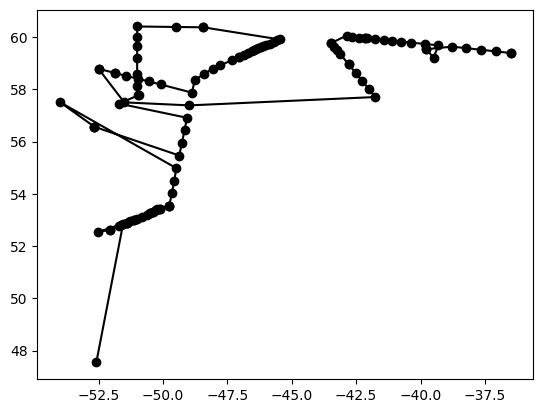

In [5]:
plt.plot(lon_CTD,lat_CTD,'k',marker='o')

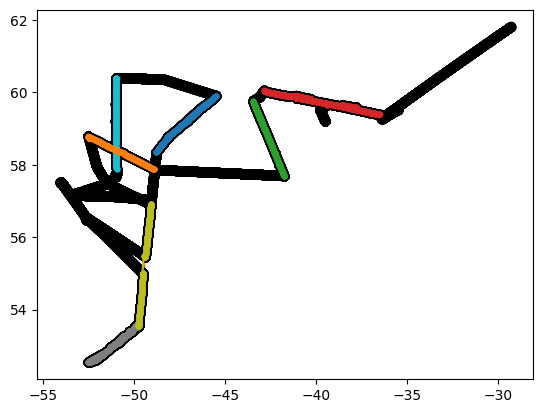

In [ ]:
ctd_sec1 = np.arange(0,28,1)
ctd_sec2 = np.array([27,28,29,30,35,36,37,38])
ctd_sec3 = np.arange(41,48,1)
ctd_sec4 = np.arange(51,71,1)
ctd_sec5 = np.arange(71,79,1)
ctd_sec6 = np.arange(82,93,1)
ctd_sec7 = np.array([93,94,95,96,97,98,99,100,101,102,103,104,105,109,110,111,112,113,114])

ind_sort = np.argsort(lon_CTD[ctd_sec1])
ctd_sec1 = ind_sort[1:]

ctd_list_sec = [ctd_sec1,ctd_sec2,ctd_sec3,ctd_sec4,ctd_sec5,
                 ctd_sec6,ctd_sec7]

for i in ctd_list_sec :
    plt.plot(lon_CTD[i],lat_CTD[i],marker='o')


plt.plot(LON_75,LAT_75,'k',marker='o')

adcp_sec1 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec1]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec1]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec1]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec1])))[0]
adcp_sec2 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec2]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec2]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec2]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec2])))[0]
adcp_sec3 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec3]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec3]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec3]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec3])))[0]
adcp_sec4 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec4]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec4]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec4]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec4])))[0]
adcp_sec5 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec5]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec5]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec5]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec5])))[0]
adcp_sec6 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec6]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec6]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec6]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec6])))[0]
adcp_sec7 = np.where((LON_75<np.nanmax(lon_CTD[ctd_sec7]))
                     &(LON_75>np.nanmin(lon_CTD[ctd_sec7]))
                     &(LAT_75>np.nanmin(lat_CTD[ctd_sec7]))
                     &(LAT_75<np.nanmax(lat_CTD[ctd_sec7])))[0]

#corrections
ind_sort = np.argsort(LON_75[adcp_sec1])
adcp_sec1 = ind_sort[1:]

ind2 = []
for i in range(len(adcp_sec2)) :
    if (i<=1030) | (i>1140) :
        ind2.append(i)

ind5 = []
for i in range(len(adcp_sec5)) :
    if (i>649) & (i<2200) :
        ind5.append(i)

ind6 = []
for i in range(len(adcp_sec6)) :
    if (i>300) :
        ind6.append(i)

ind7 = []
for i in range(len(adcp_sec7)) :
    if (i<=2200) | (i>2800) :
        ind7.append(i)

adcp_list_sec = [adcp_sec1,adcp_sec2[ind2],adcp_sec3,adcp_sec4,adcp_sec5[ind5],adcp_sec6[ind6],
            adcp_sec7[ind7]]

for i in adcp_list_sec :
    plt.plot(LON_75[i],LAT_75[i],marker='.')


[20528 20529 20530 ... 22697 22698 22699]


/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_15657/1537866389.py:21: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(X.T,Y.T,Z.T, cmap=cmap,vmin=-1,vmax=1, alpha=1)
/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_15657/1537866389.py:30: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pc, cax=cax)


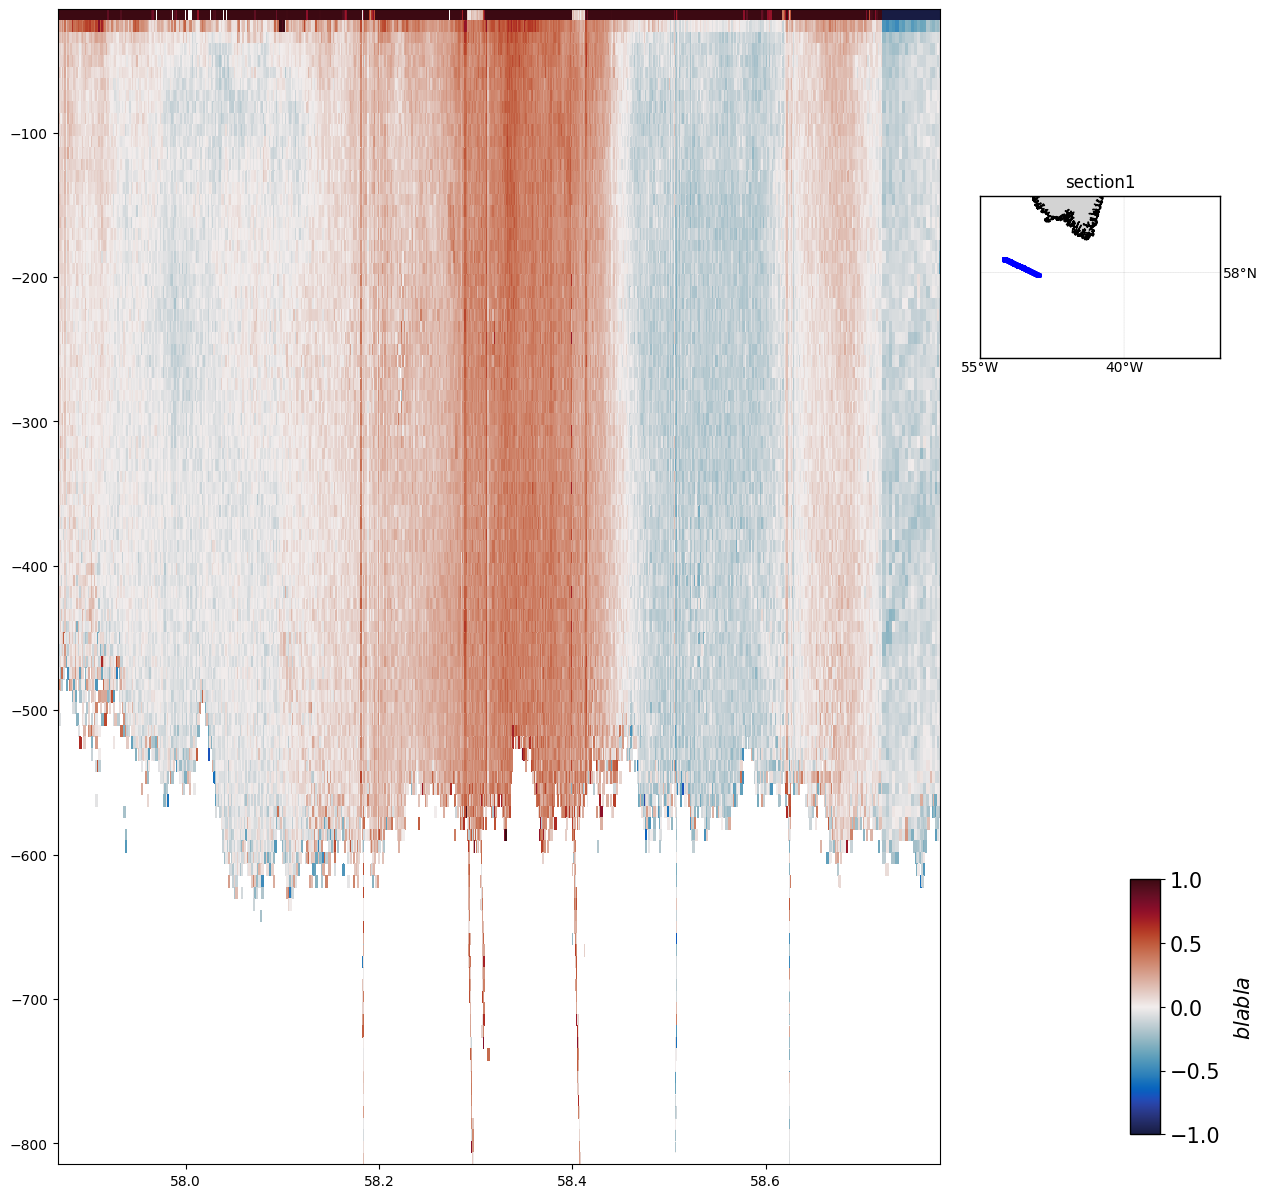

In [12]:
c=1
adcp_list_sec = [adcp_sec5[ind5]]
for sec in adcp_list_sec : 
    print(sec)

#Affichage rapide 
    fig = plt.figure(figsize=(15,15),facecolor='w')
    gs0 = gridspec.GridSpec(1, 1, figure=fig)
    gs01 = gridspec.GridSpecFromSubplotSpec(15, 29, wspace=0, hspace=0.1, subplot_spec=gs0[0,0])
    ax1 = fig.add_subplot(gs01[0:15,0:22])
    ax2 = fig.add_subplot(gs01[0:7, 23:29])

    #X = ind_X
    #Y = ind_Z[0:1500]
    #Z = abs(dVAR2_dx_smooth[2,:,0:1500])
    X = LAT_75[sec]
    Y = ADCP_75[0,sec,:]
    Z =  ADCP_75[2,sec,:] #EPVx[145:445,0:1500]  
    ax = ax1
    cmap = cmocean.cm.balance
    pc = ax.pcolor(X.T,Y.T,Z.T, cmap=cmap,vmin=-1,vmax=1, alpha=1)
    '''
    Contourrange1 = np.arange(27,28,0.1)
    scb1 = ax.contour(Mat_lat.T,Y.T,np.transpose(VAR[4,sec,:]),Contourrange1, linestyle='dashed', colors='k',alpha=1, rasterized='True')
    ax.clabel(scb1, fontsize=12, inline=1)
    h1,_ = scb1.legend_elements()
    ax.legend([h1[0]], ['isopycnal'],loc='lower right', fontsize=15)
    '''
    cax = fig.add_axes([0.84, 0.13, 0.02, 0.17])
    cbar = fig.colorbar(pc, cax=cax)
    cbar.ax.tick_params(labelsize=15) 
    cax.ticklabel_format(style="sci", scilimits=(0,0))
    ctext1 = r'$ blabla $'
    cbar.set_label(ctext1,fontsize= 15 ,labelpad=10)
    cbar.outline.set_linewidth(1)
    
    ax=ax2
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.tick_params(labelsize=15)
    plt.axes(ax,rasterized='True')
    corners=[-55,53, -30,62]
    map = Basemap(llcrnrlon=corners[0],llcrnrlat=corners[1],urcrnrlon=corners[2],urcrnrlat=corners[3],
              resolution='i',projection='merc')
    dmp=5
    parallels = np.arange(53,62,dmp)
    meridians=np.arange(-55,-30,3*dmp)
    map.drawparallels(parallels,labels=[False,True,False,False],fontsize=10,linewidth=0.1,rasterized='True')
    map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=10,linewidth=0.1,rasterized='True') 
    map.drawcoastlines()
    map.fillcontinents('lightgrey')
    
    
    xmap, ymap = map(LON_75[sec], LAT_75[sec])
    pos = ax.plot(xmap, ymap,'b', marker='.', alpha=1, ms=5, rasterized='True')

    ax.set_title('section'+str(c))
    c = c + 1


In [ ]:

num_sec = 3 #de 1 à 7

#ADCP
sec = adcp_list_sec[num_sec-1]
Lon_AD = LON_75[sec]
Lat_AD = LAT_75[sec]
alpha = np.arctan((Lat_AD[-1]-Lat_AD[0])/(Lon_AD[-1]-Lon_AD[0]))
ADCP_75[3,sec,:] = -ADCP_75[1,sec,:]*np.sin(alpha) + ADCP_75[2,sec,:]*np.cos(alpha)
VAR2 = ADCP_75[:,sec,:]

#uCTD
sec = ctd_list_sec[num_sec-1]
Lon_CTD = lon_CTD[sec]
Lat_CTD = lat_CTD[sec]

#Pour que les CTD coïncident bien avec les ADCP
# décalage entre le premier point de ADCP et la premier point de uCTD
# Il faut vérifier quel premier point entre ADCP et UCTD est le plus 
# à l'ouest (ou à l'est suivant les sections)

#section 1 : premier point plus à l'ouest = ADCP
c = np.pi/180
s = ma.acos(np.sin(Lat_AD[0]*c)*np.sin(Lat_CTD[0]*c) + np.cos(Lat_AD[0]*c)*np.cos(Lat_CTD[0]*c)*np.cos((Lon_CTD[0]-Lon_AD[0])*c))
delta_L = 6378137*s/1000 #décalage entre le premier point de chaque appareil

plt.plot(Lon_CTD[0:5],Lat_CTD[0:5],marker='o')
plt.plot(Lon_AD[0:5],Lat_AD[0:5],marker='o')
# Vecteur X
L_AD = np.zeros(Lon_AD.shape[0])
for i in range(len(Lon_AD)) :
    s = ma.acos(np.sin(Lat_AD[0]*c)*np.sin(Lat_AD[i]*c) + np.cos(Lat_AD[0]*c)*np.cos(Lat_AD[i]*c)*np.cos((Lon_AD[i]-Lon_AD[0])*c))
    L_AD[i] = 6378137*s/1000 #distance en km

L_CTD = np.zeros(Lon_CTD.shape[0])
for i in range(len(Lon_CTD)) :
    s = ma.acos(np.sin(Lat_CTD[0]*c)*np.sin(Lat_CTD[i]*c) + np.cos(Lat_CTD[0]*c)*np.cos(Lat_CTD[i]*c)*np.cos((Lon_CTD[i]-Lon_CTD[0])*c))
    L_CTD[i] = 6378137*s/1000 #distance en km

VAR1 = VAR[:,sec,:]
#%%

/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_15657/2670591051.py:18: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(X.T,Y.T,Z.T, cmap=cmap,vmin=-1,vmax=1, alpha=1)
/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_15657/2670591051.py:27: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pc, cax=cax)
/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_15657/2670591051.py:18: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, pleas

NameError: name 'interpolate' is not defined

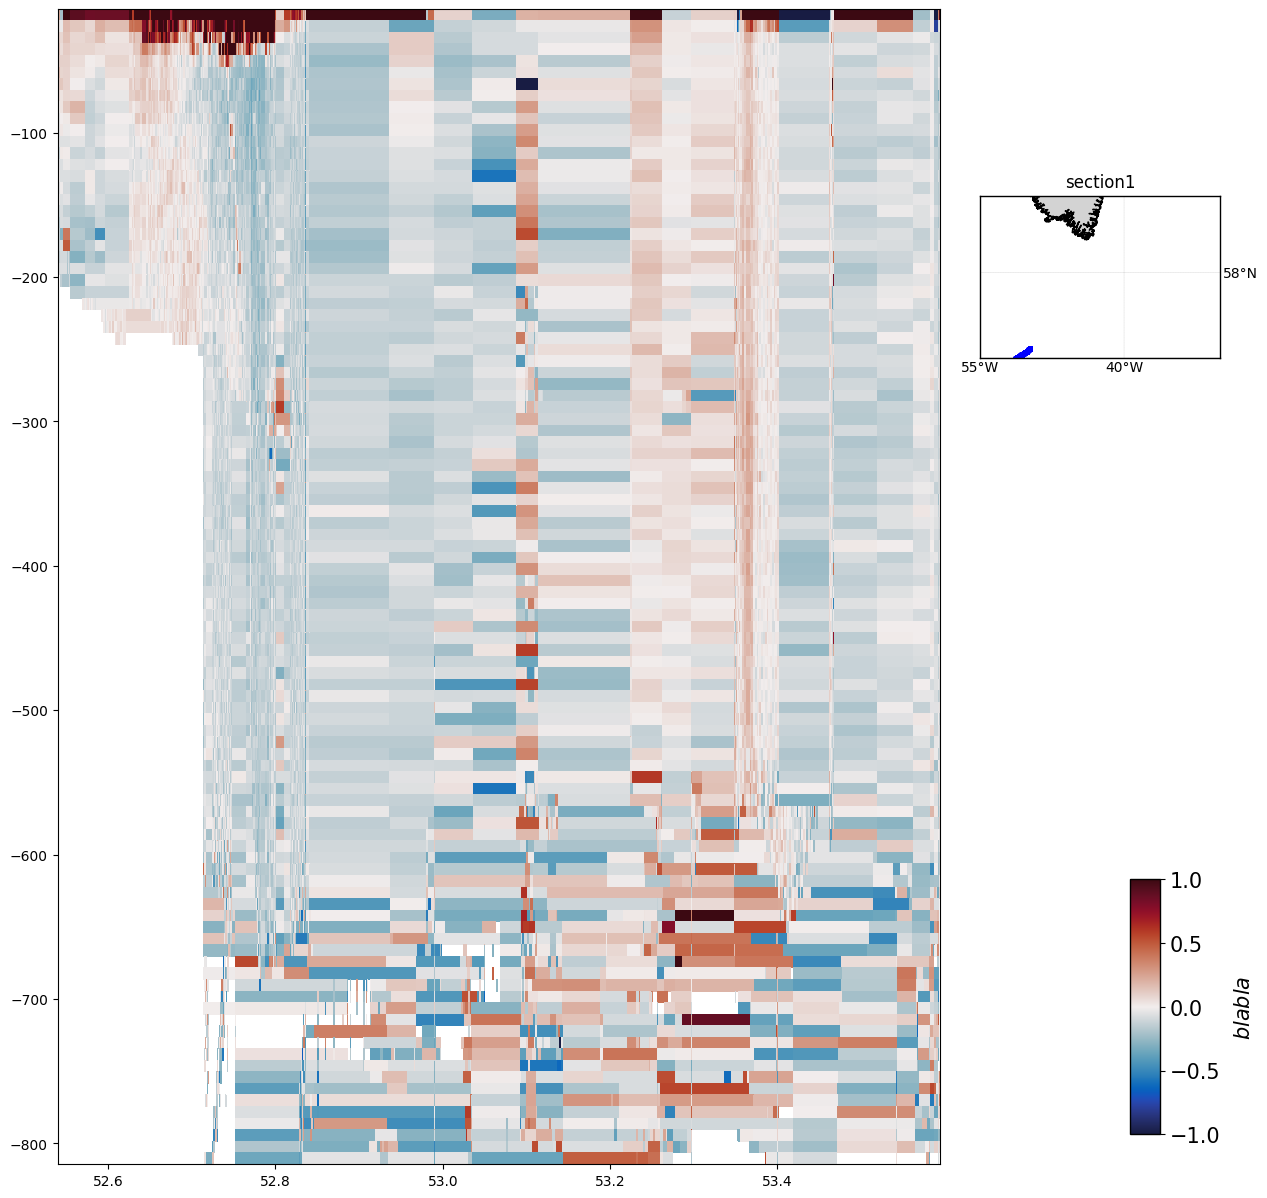

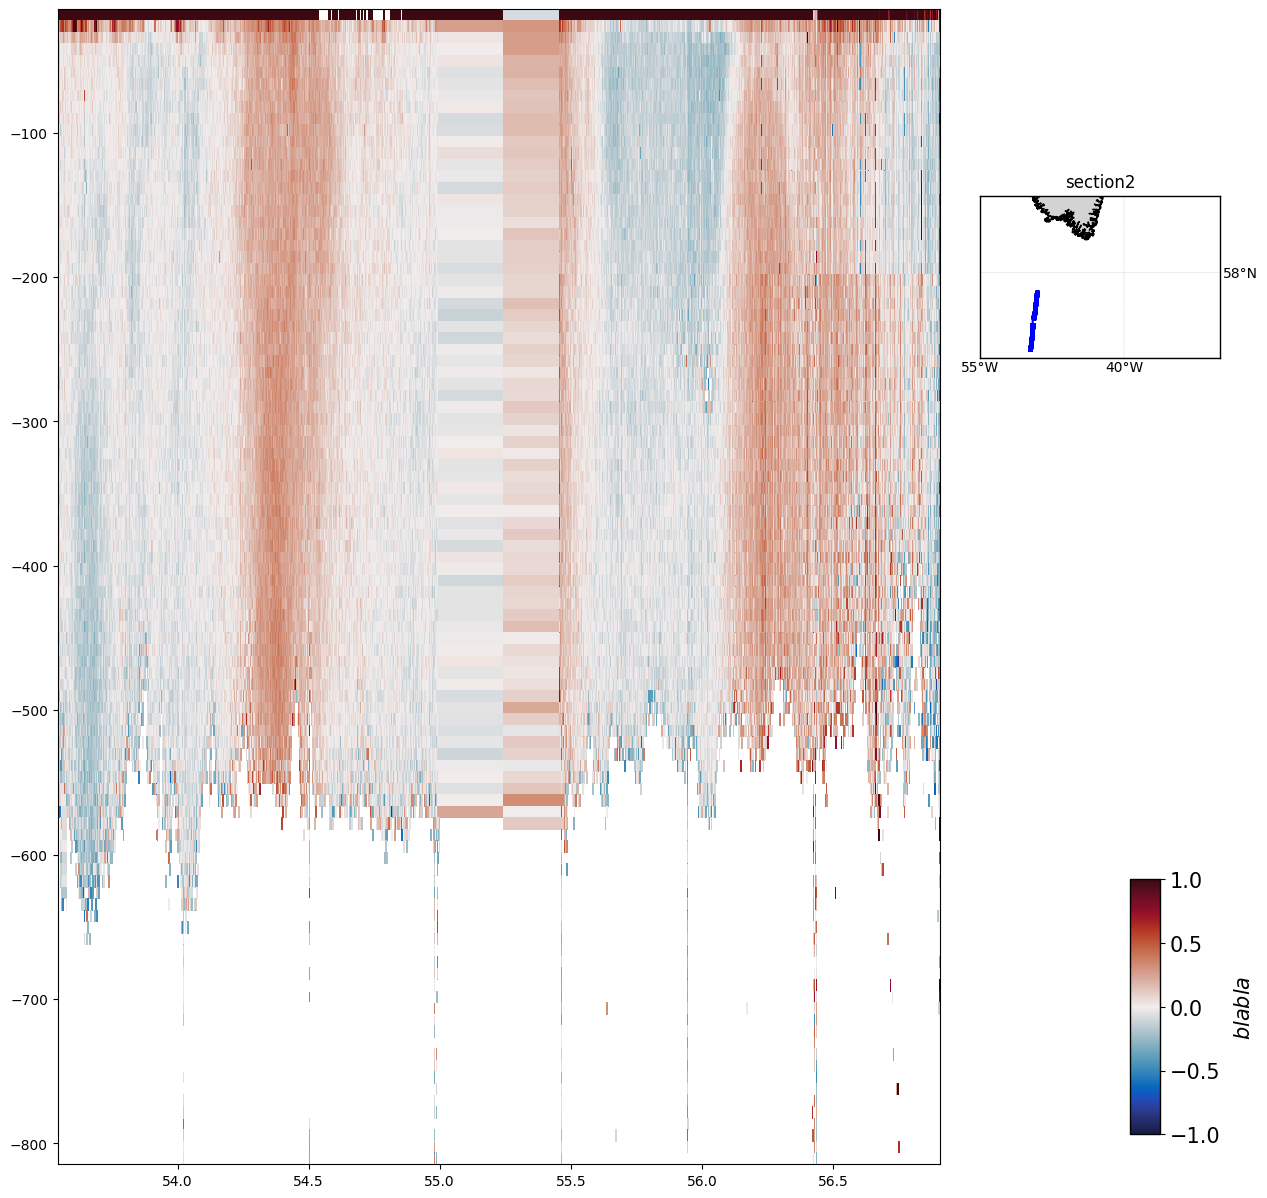

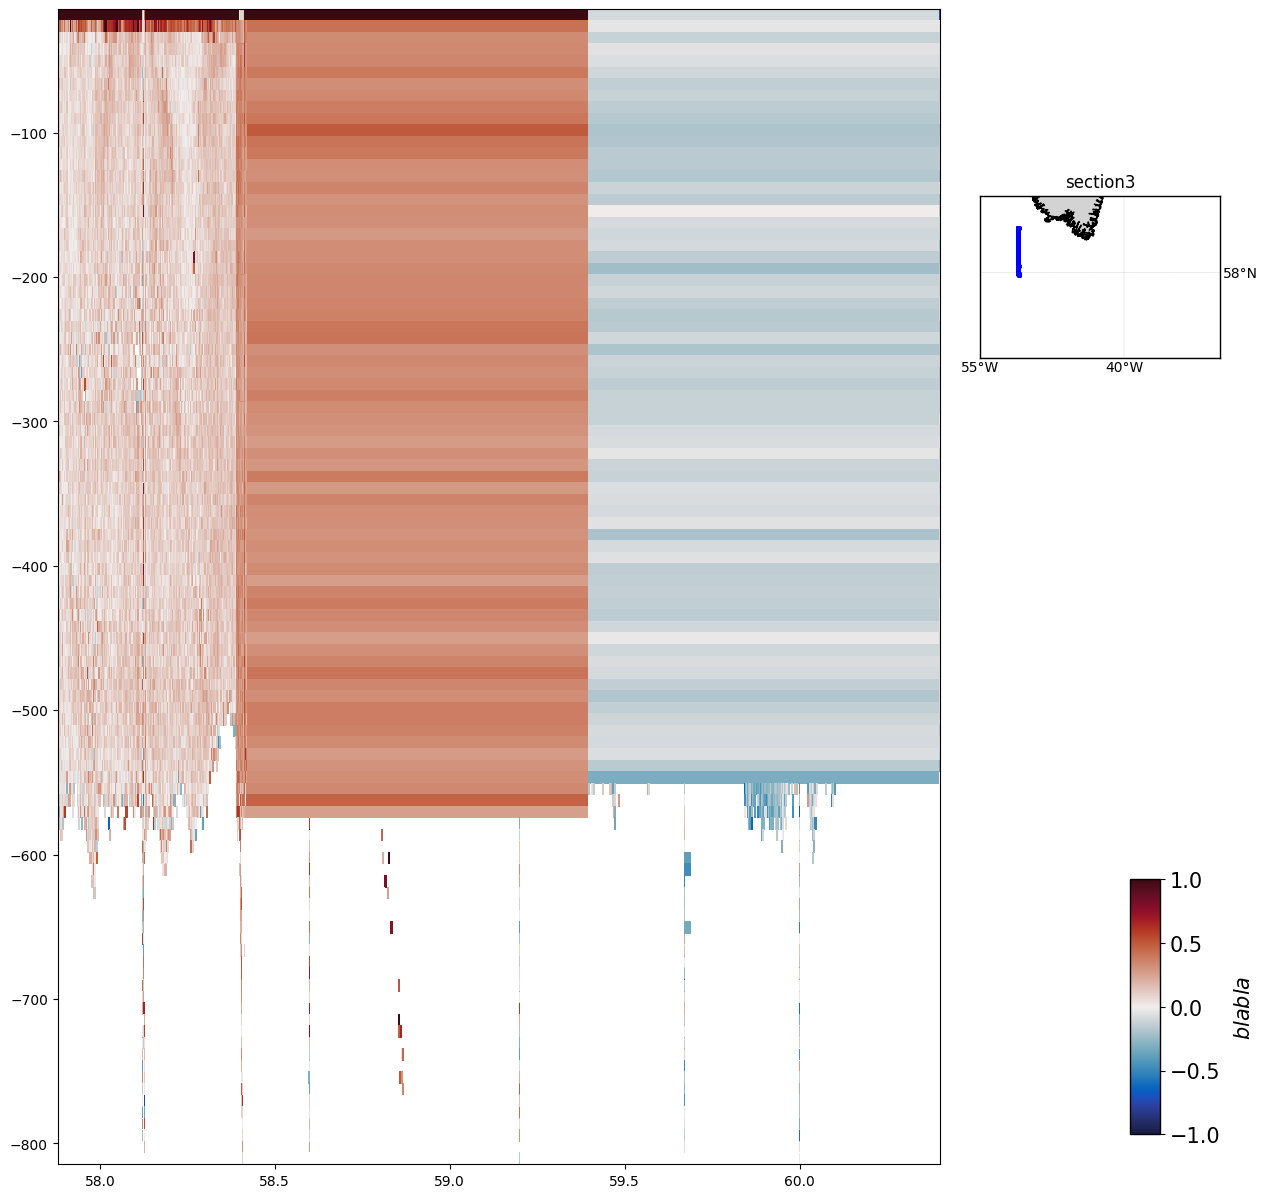

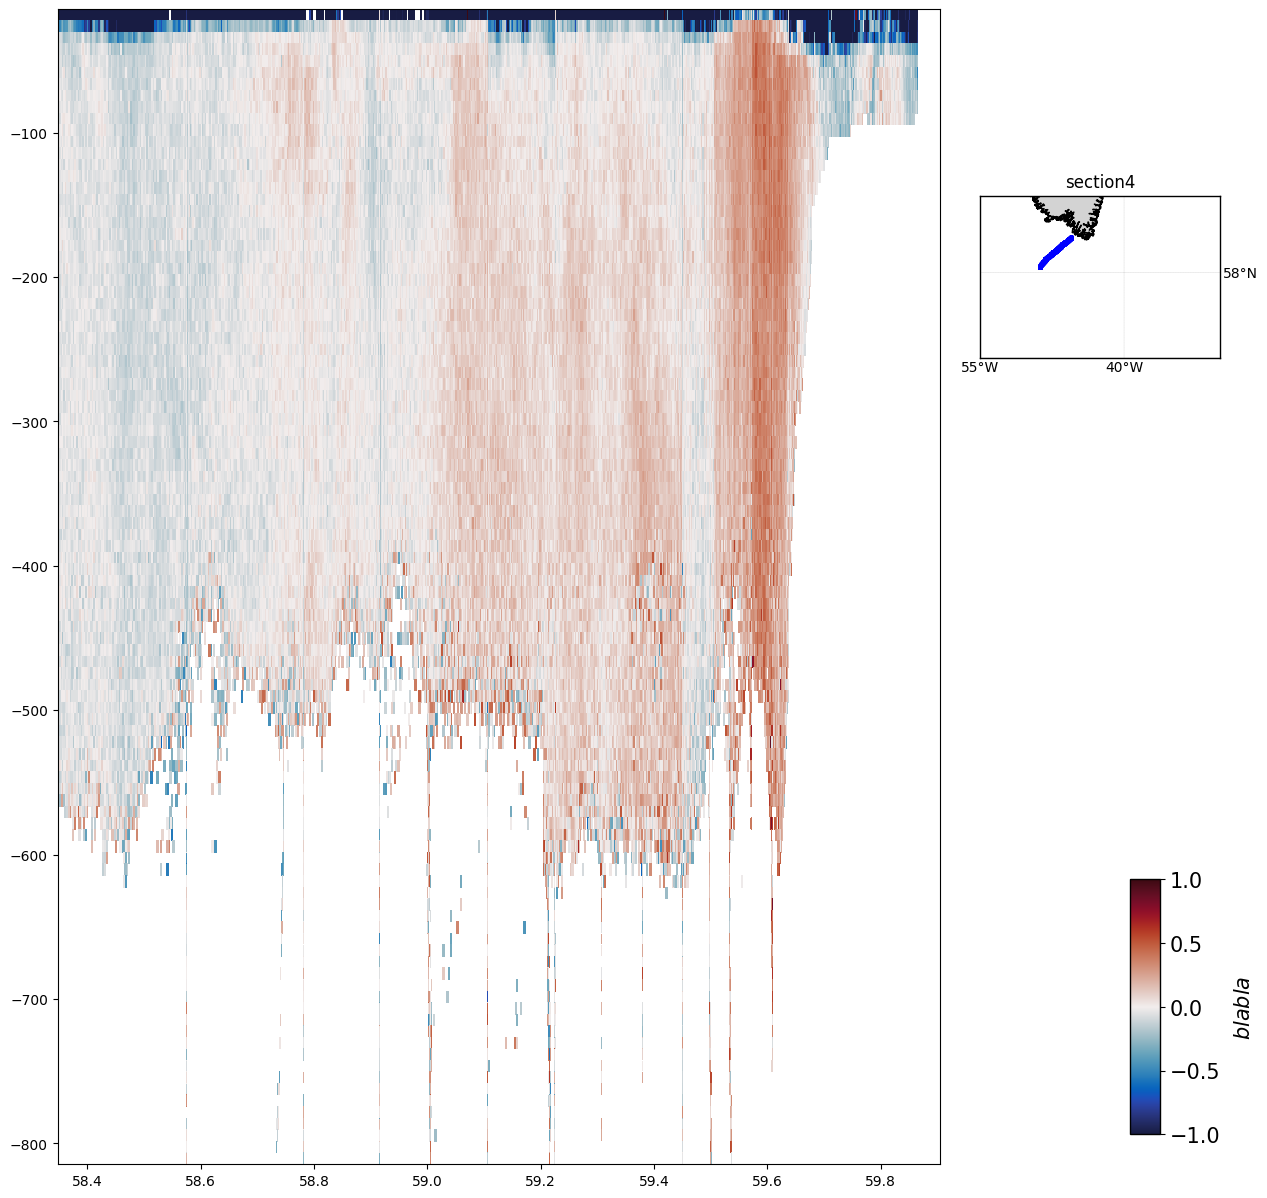

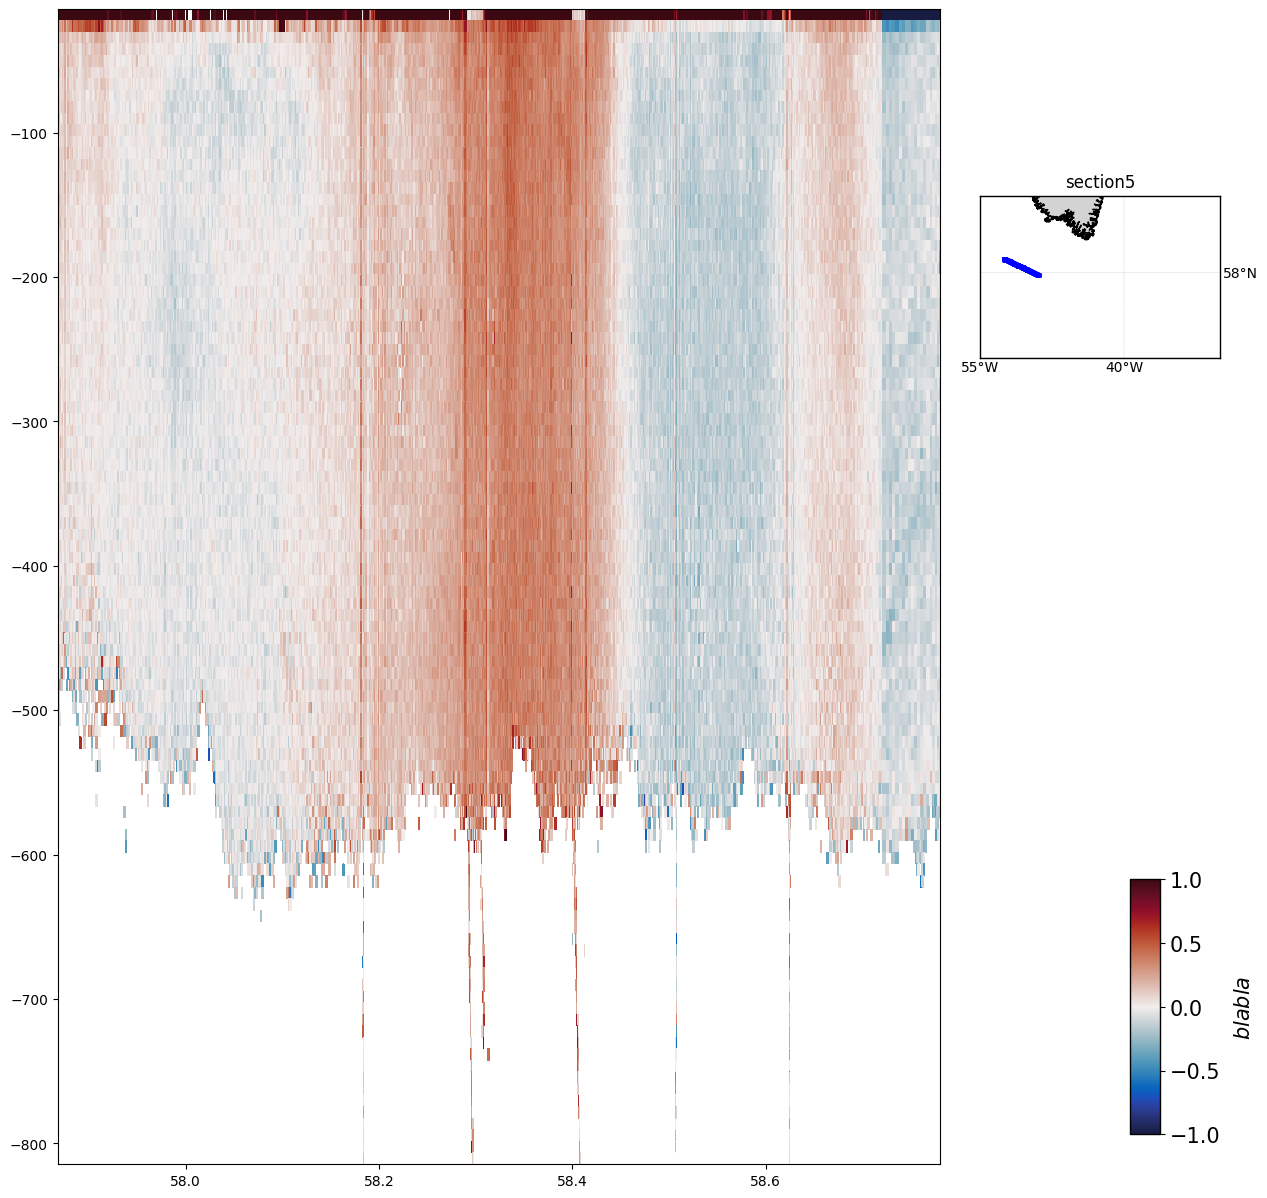

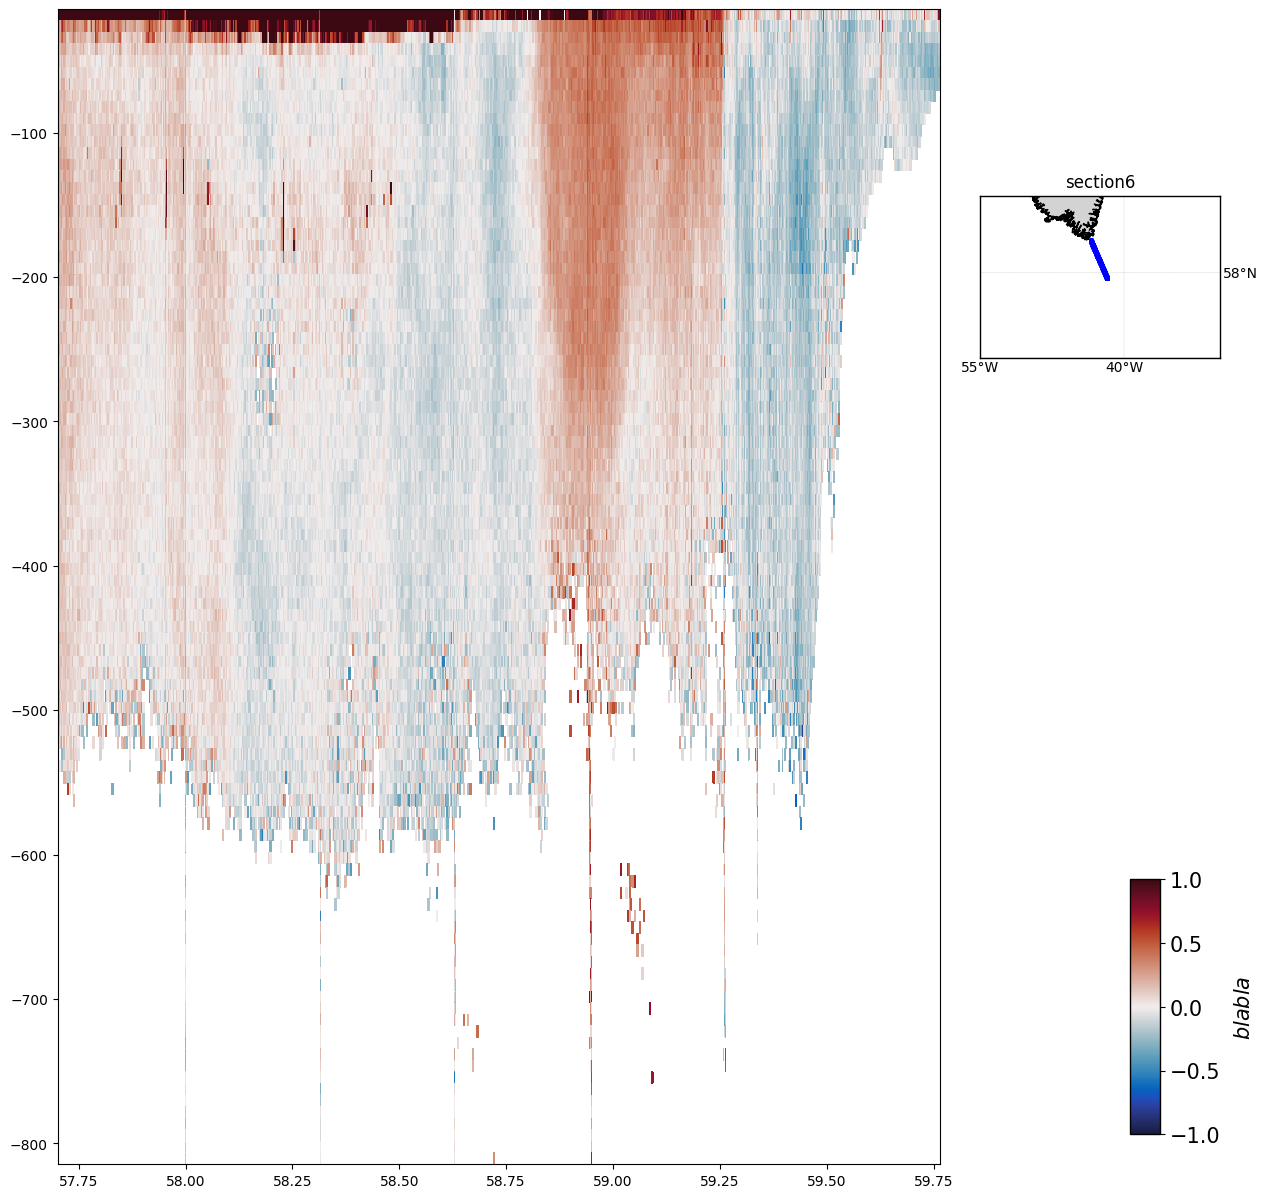

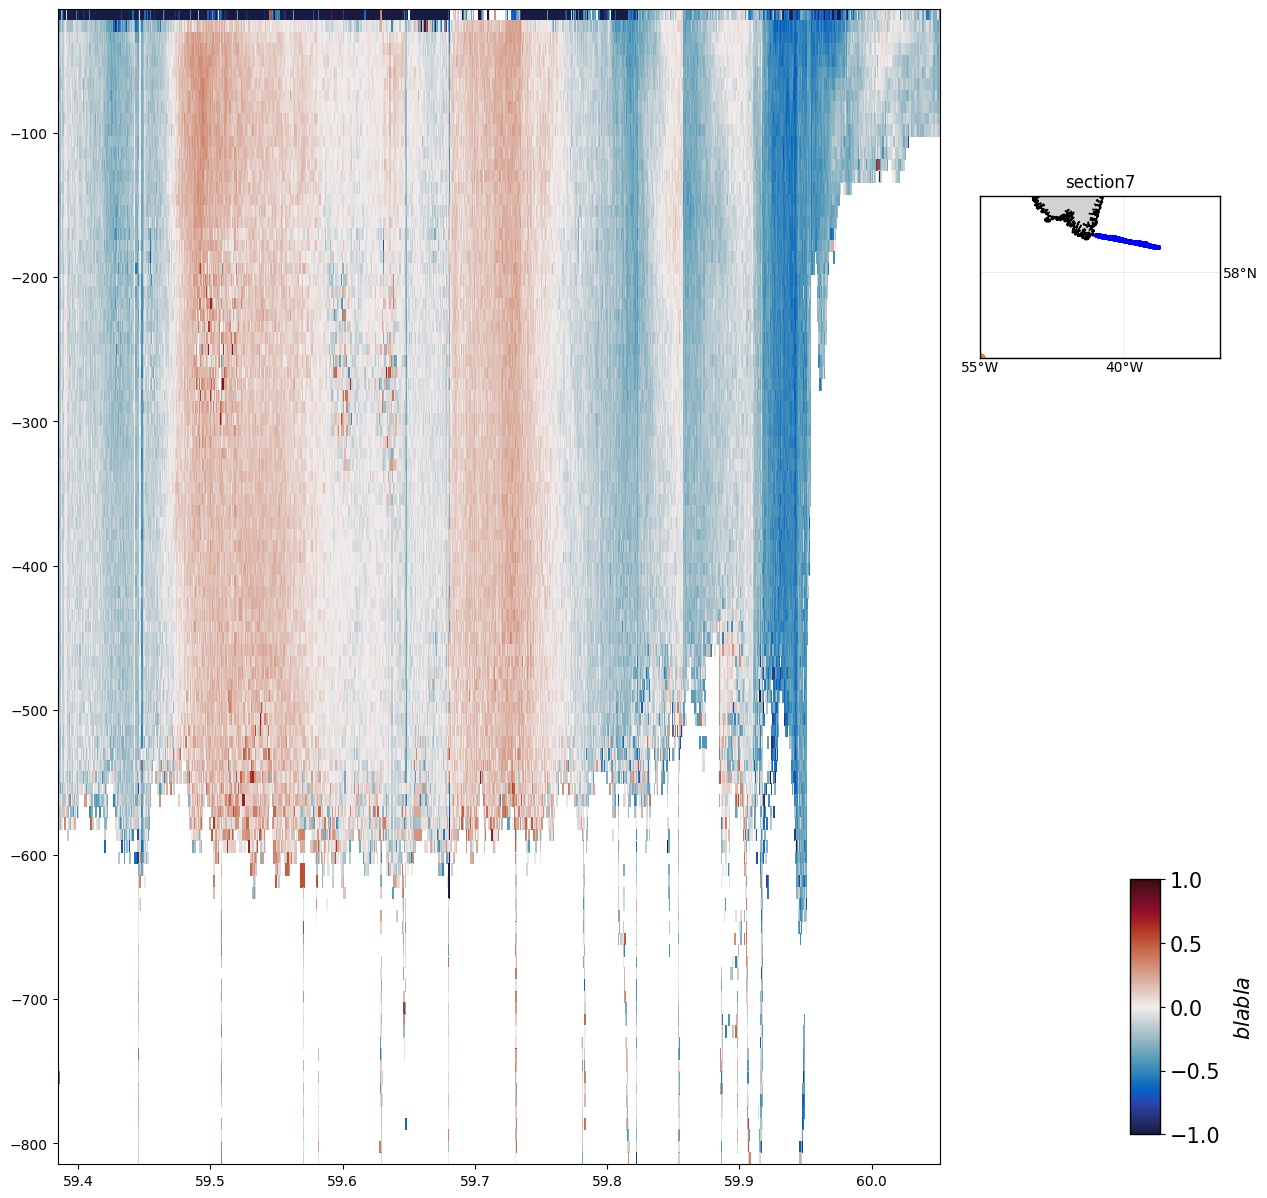

In [ ]:
# Premier filtrage sur les données de brute : on lisse sur 2 points de mesures en X et Z

f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/10 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille en Z (avec résolution max 0.5m ~0.5dBar) 
VAR_smooth_Z = np.zeros((6,VAR1.shape[1],VAR1.shape[2]))
VAR_smooth_Z[:] = np.nan

for i in [0,1,2,3,4,5] : #On ne prend que U_lisse et V_lisse
    for j in range(VAR1.shape[1]) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(VAR1[i,j,:])==0)[0]
        #print(ind)
        if len(ind)>15 : 
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_Z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(VAR1[i,j,ind]))
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_Z[i,j,ind] = VAR_smooth_Z[i,j,ind] + VAR1[i,j,ind]-signal.detrend(VAR1[i,j,ind])


# TF + préparation filtre selon X
f_s = 1/8 #resolution 2m
f_nyq = f_s/2
f_c = 1/17 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

VAR_smooth_XZ = np.zeros((6,VAR1.shape[1],VAR1.shape[2]))
VAR_smooth_XZ[:] = np.nan

for i in [0,1,2,3,4,5] :
    for j in range(VAR1.shape[2]) :
        ind = np.where(np.isnan(VAR_smooth_Z[i,:,j])==0)[0]
        #print(len(ind))
        if len(ind)>5 : 
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_XZ[i,ind,j] = signal.filtfilt(b,a,signal.detrend(VAR_smooth_Z[i,ind,j]),padlen=5)
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_XZ[i,ind,j] = VAR_smooth_XZ[i,ind,j] + VAR_smooth_Z[i,ind,j]-signal.detrend(VAR_smooth_Z[i,ind,j])

VAR1 = VAR_smooth_XZ
del VAR_smooth_XZ, VAR_smooth_Z

# Idem pour VAR2

f_s = 1/8 #resolution 2m
f_nyq = f_s/2
f_c = 1/17 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille en Z (avec résolution max 0.5m ~0.5dBar) 
VAR_smooth_Z = np.zeros((4,VAR2.shape[1],VAR2.shape[2]))
VAR_smooth_Z[:] = np.nan

for i in [0,1,2,3] : #On ne prend que U_lisse et V_lisse
    for j in range(VAR2.shape[1]) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(VAR2[i,j,:])==0)[0]
        #print(ind)
        if len(ind)>15 : 
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_Z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(VAR2[i,j,ind]))
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_Z[i,j,ind] = VAR_smooth_Z[i,j,ind] + VAR2[i,j,ind]-signal.detrend(VAR2[i,j,ind])

# TF + préparation filtre selon X
f_s = 1/0.027 #resolution 2m
f_nyq = f_s/2
f_c = 1/(0.027*5) #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille X (avec résolution de 1km)
VAR_smooth_XZ = np.zeros((4,VAR2.shape[1],VAR2.shape[2]))
VAR_smooth_XZ[:] = np.nan

for i in [0,1,2,3] :
    for j in range(VAR2.shape[2]) :
        ind = np.where(np.isnan(VAR_smooth_Z[i,:,j])==0)[0]
        if len(ind)>8 : 
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_XZ[i,ind,j] = signal.filtfilt(b,a,signal.detrend(VAR_smooth_Z[i,ind,j]),padlen=8)
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_XZ[i,ind,j] = VAR_smooth_XZ[i,ind,j] + VAR_smooth_Z[i,ind,j]-signal.detrend(VAR_smooth_Z[i,ind,j])

VAR2 = VAR_smooth_XZ
del VAR_smooth_XZ, VAR_smooth_Z


#%%

# TF + préparation filtre selon Z
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/30 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille en Z (avec résolution max 0.5m ~0.5dBar) 
ind_Z = np.arange(0,-1500,-1)
VAR_interp_Z = np.zeros((6,len(L_CTD),len(ind_Z)))
VAR_interp_Z[:] = np.nan
VAR_smooth_Z = np.zeros((6,len(L_CTD),len(ind_Z)))
VAR_smooth_Z[:] = np.nan

for i in [0,1,2,3,4,5] : 
    for j in range(len(L_CTD)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(VAR1[i,j,:])==0)[0]
        #print(ind)
        if len(ind)>1 : 
            f = interpolate.interp1d(VAR1[1,j,ind],VAR1[i,j,ind],'linear')
            #ind_t pour que la liste des nouveaux points soit inclu dans celle de VAR
            ind_t = np.arange(np.where(ind_Z<=np.nanmax(VAR1[1,j,ind]))[0][0],
                              np.where(ind_Z>=np.nanmin(VAR1[1,j,ind]))[0][-1])
            VAR_interp_Z[i,j,ind_t] = f(ind_Z[ind_t])
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_Z[i,j,ind_t] = signal.filtfilt(b,a,signal.detrend(VAR_interp_Z[i,j,ind_t]))
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_Z[i,j,ind_t] = VAR_smooth_Z[i,j,ind_t] + VAR_interp_Z[i,j,ind_t]-signal.detrend(VAR_interp_Z[i,j,ind_t])


# TF + préparation filtre selon X
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille X (avec résolution de 1km)
ind_X = np.arange(0,500,1)
VAR_interp_XZ = np.zeros((6,len(ind_X),len(ind_Z)))
VAR_interp_XZ[:] = np.nan
VAR_smooth_XZ = np.zeros((6,len(ind_X),len(ind_Z)))
VAR_smooth_XZ[:] = np.nan

for i in [0,1,2,3,4,5] :
    for j in range(len(ind_Z)) :
        ind = np.where(np.isnan(VAR_smooth_Z[i,:,j])==0)[0]
        if len(ind)>1 : 
            f = interpolate.interp1d(L_CTD[ind],VAR_smooth_Z[i,ind,j],'linear')
            ind_t = np.arange(np.where(ind_X>=np.nanmin(L_CTD[ind]))[0][0],
                              np.where(ind_X<=np.nanmax(L_CTD[ind]))[0][-1])
            VAR_interp_XZ[i,ind_t,j] = f(ind_X[ind_t])
            #On enlève la valeur moyenne et on filtre 
            VAR_smooth_XZ[i,ind_t,j] = signal.filtfilt(b,a,signal.detrend(VAR_interp_XZ[i,ind_t,j]))
            #On rajoute la valeur moyenne initiale sur toute la colonne
            VAR_smooth_XZ[i,ind_t,j] = VAR_smooth_XZ[i,ind_t,j] + VAR_interp_XZ[i,ind_t,j]-signal.detrend(VAR_interp_XZ[i,ind_t,j])

VAR_interp = VAR_interp_XZ
VAR_smooth = VAR_smooth_XZ

#del VAR_interp_Z, VAR_smooth_Z, VAR_interp_XZ, VAR_smooth_XZ

lon = np.zeros((1,len(ind_X)))[0]
lat = np.zeros((1,len(ind_X)))[0]

f = interpolate.interp1d(L_CTD,Lon_CTD,'linear')
ind_t = np.arange(np.where(ind_X>=np.nanmin(L_CTD))[0][0],
                  np.where(ind_X<=np.nanmax(L_CTD))[0][-1])
lon[ind_t] = f(ind_X[ind_t])
f = interpolate.interp1d(L_CTD,Lat_CTD,'linear')
lat[ind_t] = f(ind_X[ind_t])

lon[0] = Lon_CTD[0]
lat[0] = Lat_CTD[0]
lon[-1] = Lon_CTD[-1]
lat[-1] = Lat_CTD[-1]

dVAR_dx = np.zeros((6,len(ind_X),len(ind_Z)))
dVAR_dz = np.zeros((6,len(ind_X),len(ind_Z)))

dx = (ind_X[1]-ind_X[0])*1000
dz = ind_Z[1]-ind_Z[0]

#on ne fait les dérivées que des variables intéressantes 
for i in [0,1,2,3,4,5] :
    for j in range(len(ind_Z)-1) :
        for k in range(len(ind_X)-1) :
            dVAR_dx[i,k+1,j] = (VAR_smooth[i,k+1,j]-VAR_smooth[i,k,j])/dx
            dVAR_dz[i,k,j+1] = (VAR_smooth[i,k,j+1]-VAR_smooth[i,k,j])/dz

# TF + préparation filtre selon Z
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

dVAR_dx_smooth_z = np.zeros((6,len(ind_X),len(ind_Z)))
dVAR_dx_smooth_z[:] = np.nan
dVAR_dz_smooth_z = np.zeros((6,len(ind_X),len(ind_Z)))
dVAR_dz_smooth_z[:] = np.nan

for i in [0,1,2,3,4,5] : 
    for j in range(len(ind_X)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(dVAR_dx[i,j,:])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dx_smooth_z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(dVAR_dx[i,j,ind]))
            dVAR_dx_smooth_z[i,j,ind] = dVAR_dx_smooth_z[i,j,ind] + dVAR_dx[i,j,ind]-signal.detrend(dVAR_dx[i,j,ind])

        ind = np.where(np.isnan(dVAR_dz[i,j,:])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dz_smooth_z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(dVAR_dz[i,j,ind]))
            dVAR_dz_smooth_z[i,j,ind] = dVAR_dz_smooth_z[i,j,ind] + dVAR_dz[i,j,ind]-signal.detrend(dVAR_dz[i,j,ind])

# TF + préparation filtre selon X
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

dVAR_dx_smooth = np.zeros((6,len(ind_X),len(ind_Z)))
dVAR_dx_smooth[:] = np.nan
dVAR_dz_smooth = np.zeros((6,len(ind_X),len(ind_Z)))
dVAR_dz_smooth[:] = np.nan

for i in [0,1,2,3,4,5] : 
    for j in range(len(ind_Z)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(dVAR_dx_smooth_z[i,:,j])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dx_smooth[i,ind,j] = signal.filtfilt(b,a,signal.detrend(dVAR_dx_smooth_z[i,ind,j]))
            dVAR_dx_smooth[i,ind,j] = dVAR_dx_smooth[i,ind,j] + dVAR_dx_smooth_z[i,ind,j]-signal.detrend(dVAR_dx_smooth_z[i,ind,j])

        ind = np.where(np.isnan(dVAR_dz_smooth_z[i,:,j])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dz_smooth[i,ind,j] = signal.filtfilt(b,a,signal.detrend(dVAR_dz_smooth_z[i,ind,j]))
            dVAR_dz_smooth[i,ind,j] = dVAR_dz_smooth[i,ind,j] + dVAR_dz_smooth_z[i,ind,j]-signal.detrend(dVAR_dz_smooth_z[i,ind,j])

del dVAR_dx_smooth_z, dVAR_dz_smooth_z

'''
##########################################################################################
##########################################################################################
##########################################################################################
'''
# TF + préparation filtre selon Z
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille en Z (avec résolution max 0.5m ~0.5dBar) 
ind_Z = np.arange(0,-600,-1)
VAR_interp_Z = np.zeros((4,len(L_AD),len(ind_Z)))
VAR_interp_Z[:] = np.nan
VAR_smooth_Z = np.zeros((4,len(L_AD),len(ind_Z)))
VAR_smooth_Z[:] = np.nan

for i in [1,2,3] : 
    for j in range(len(L_AD)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(VAR2[i,j,:])==0)[0]
        if len(ind)>1 : 
            f = interpolate.interp1d(VAR2[0,j,ind],VAR2[i,j,ind],'linear')
            #ind_t pour que la liste des nouveaux points soit inclu dans celle de VAR
            ind_t = np.arange(np.where(ind_Z<=np.nanmax(VAR2[0,j,ind]))[0][0],
                              np.where(ind_Z>=np.nanmin(VAR2[0,j,ind]))[0][-1])
            if (len(ind_t)>int(1/f_c)) & (len(ind_t)>15) :
                VAR_interp_Z[i,j,ind_t] = f(ind_Z[ind_t])
                #On enlève la valeur moyenne et on filtre 
                VAR_smooth_Z[i,j,ind_t] = signal.filtfilt(b,a,signal.detrend(VAR_interp_Z[i,j,ind_t]))
                #On rajoute la valeur moyenne initiale sur toute la colonne
                VAR_smooth_Z[i,j,ind_t] = VAR_smooth_Z[i,j,ind_t] + VAR_interp_Z[i,j,ind_t]-signal.detrend(VAR_interp_Z[i,j,ind_t])
    
# TF + préparation filtre selon X
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

#Interpolation sur la grille X (avec résolution de 1km)
ind_X = np.arange(0,500,1)
VAR_interp_XZ = np.zeros((4,len(ind_X),len(ind_Z))) #3 car on laisse une place pour rho
VAR_interp_XZ[:] = np.nan
VAR_smooth_XZ = np.zeros((4,len(ind_X),len(ind_Z))) #idem
VAR_smooth_XZ[:] = np.nan


for i in [1,2,3] :
    for j in range(len(ind_Z)) :
        ind = np.where(np.isnan(VAR_smooth_Z[i,:,j])==0)[0]
        if len(ind)>1 : 
            f = interpolate.interp1d(L_AD[ind],VAR_smooth_Z[i,ind,j],'linear')
            ind_t = np.arange(np.where(ind_X>=np.nanmin(L_AD[ind]))[0][0],
                              np.where(ind_X<=np.nanmax(L_AD[ind]))[0][-1])
            if (len(ind_t)>int(1/f_c)) & (len(ind_t)>15) :
                VAR_interp_XZ[i,ind_t,j] = f(ind_X[ind_t])
                #On enlève la valeur moyenne et on filtre 
                VAR_smooth_XZ[i,ind_t,j] = signal.filtfilt(b,a,signal.detrend(VAR_interp_XZ[i,ind_t,j]))
                #On rajoute la valeur moyenne initiale sur toute la colonne
                VAR_smooth_XZ[i,ind_t,j] = VAR_smooth_XZ[i,ind_t,j] + VAR_interp_XZ[i,ind_t,j]-signal.detrend(VAR_interp_XZ[i,ind_t,j])
    
VAR2_interp = VAR_interp_XZ
VAR2_smooth = VAR_smooth_XZ

del VAR_interp_Z, VAR_smooth_Z, VAR_interp_XZ, VAR_smooth_XZ

lon2 = np.zeros((1,len(ind_X)))[0]
lat2 = np.zeros((1,len(ind_X)))[0]

f = interpolate.interp1d(L_AD,Lon_AD,'linear')
ind_t = np.arange(np.where(ind_X>=np.nanmin(L_AD))[0][0],
                  np.where(ind_X<=np.nanmax(L_AD))[0][-1])
lon2[ind_t] = f(ind_X[ind_t])
f = interpolate.interp1d(L_AD,Lat_AD,'linear')
lat2[ind_t] = f(ind_X[ind_t])

lon2[0] = Lon_AD[0]
lat2[0] = Lat_AD[0]
lon2[-1] = Lon_AD[-1]
lat2[-1] = Lat_AD[-1]

#Calcul des dérivés et attribution des variables + lissage des dérivées
dVAR_dx = np.zeros((4,len(ind_X),len(ind_Z)))
dVAR_dz = np.zeros((4,len(ind_X),len(ind_Z)))

dx = (ind_X[1]-ind_X[0])*1000
dz = ind_Z[1]-ind_Z[0]

#on ne fait les dérivées que des variables intéressantes 
for i in [1,2,3] :
    for j in range(len(ind_Z)-1) :
        for k in range(len(ind_X)-1) :
            dVAR_dx[i,k+1,j] = (VAR2_smooth[i,k+1,j]-VAR2_smooth[i,k,j])/dx
            dVAR_dz[i,k,j+1] = (VAR2_smooth[i,k,j+1]-VAR2_smooth[i,k,j])/dz

# TF + préparation filtre selon Z
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

dVAR_dx_smooth_z = np.zeros((4,len(ind_X),len(ind_Z)))
dVAR_dx_smooth_z[:] = np.nan
dVAR_dz_smooth_z = np.zeros((4,len(ind_X),len(ind_Z)))
dVAR_dz_smooth_z[:] = np.nan

for i in [1,2,3] : 
    for j in range(len(ind_X)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(dVAR_dx[i,j,:])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dx_smooth_z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(dVAR_dx[i,j,ind]))
            dVAR_dx_smooth_z[i,j,ind] = dVAR_dx_smooth_z[i,j,ind] + dVAR_dx[i,j,ind]-signal.detrend(dVAR_dx[i,j,ind])

        ind = np.where(np.isnan(dVAR_dz[i,j,:])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR_dz_smooth_z[i,j,ind] = signal.filtfilt(b,a,signal.detrend(dVAR_dz[i,j,ind]))
            dVAR_dz_smooth_z[i,j,ind] = dVAR_dz_smooth_z[i,j,ind] + dVAR_dz[i,j,ind]-signal.detrend(dVAR_dz[i,j,ind])

# TF + préparation filtre selon X
f_s = 1/1 #resolution 2m
f_nyq = f_s/2
f_c = 1/20 #1/20 #Fréquence de coupure
order = 4 #ordre du filtre 
b,a = signal.butter(order,f_c/f_nyq) #par défaut passe-bas

dVAR2_dx_smooth = np.zeros((4,len(ind_X),len(ind_Z)))
dVAR2_dx_smooth[:] = np.nan
dVAR2_dz_smooth = np.zeros((4,len(ind_X),len(ind_Z)))
dVAR2_dz_smooth[:] = np.nan

for i in [1,2,3] : 
    for j in range(len(ind_Z)) :
        #là où les valeurs ne sont pas des np.nan
        ind = np.where(np.isnan(dVAR_dx_smooth_z[i,:,j])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR2_dx_smooth[i,ind,j] = signal.filtfilt(b,a,signal.detrend(dVAR_dx_smooth_z[i,ind,j]))
            dVAR2_dx_smooth[i,ind,j] = dVAR2_dx_smooth[i,ind,j] + dVAR_dx_smooth_z[i,ind,j]-signal.detrend(dVAR_dx_smooth_z[i,ind,j])

        ind = np.where(np.isnan(dVAR_dz_smooth_z[i,:,j])==0)[0]
        if len(ind)>int(1/f_c) : 
            dVAR2_dz_smooth[i,ind,j] = signal.filtfilt(b,a,signal.detrend(dVAR_dz_smooth_z[i,ind,j]))
            dVAR2_dz_smooth[i,ind,j] = dVAR2_dz_smooth[i,ind,j] + dVAR_dz_smooth_z[i,ind,j]-signal.detrend(dVAR_dz_smooth_z[i,ind,j])

del dVAR_dx_smooth_z, dVAR_dz_smooth_z

#%%
Nsq = np.zeros((len(ind_X),1499))
Tu = np.zeros((len(ind_X),1499))
for i in range(len(ind_X)) :
    SA = gsw.SA_from_SP(VAR_smooth[3,i,:], VAR_smooth[0,i,:], lon[i], lat[i])
    CT = gsw.CT_from_t(SA,VAR_smooth[2,i,:],VAR_smooth[0,i,:])
    [N2,p_mid] = gsw.stability.Nsquared(SA,CT, VAR_smooth[0,i,:])
    Nsq[i,:] = N2
    [tu,Rsub,p_mid] = gsw.stability.Turner_Rsubrho(SA,CT,VAR_smooth[0,i,:])
    Tu[i,:] = tu


inter = ind_X[int(delta_L):]
inter2 = ind_X[:(len(ind_X)-int(delta_L))]
Temp = VAR_smooth[2,inter,:]
S = VAR_smooth[3,inter,:]
Sig = VAR_smooth[4,inter,:]
O2 = VAR_smooth[5,inter,:]

U = VAR2_smooth[1,inter2,:]
V = VAR2_smooth[2,inter2,:]
Vo = VAR2_smooth[3,inter2,:]

dT_dx = dVAR_dx_smooth[2,inter,:]
dT_dz = dVAR_dz_smooth[2,inter,:]
dS_dx = dVAR_dx_smooth[3,inter,:]
dS_dz = dVAR_dz_smooth[3,inter,:]
dSig_dx = dVAR_dx_smooth[4,inter,:]
dSig_dz = dVAR_dz_smooth[4,inter,:]

n2 = Nsq[inter,:]
tu = Tu[inter,:]

dVo_dx = dVAR2_dx_smooth[3,inter2,:]
dVo_dz = dVAR2_dz_smooth[3,inter2,:]

grad_Temp = np.sqrt(dT_dx**2 + dT_dz**2)
grad_S = np.sqrt(dS_dx**2 + dS_dz**2)
grad_Vo = np.sqrt(dVo_dx**2 + dVo_dz**2)

ind_Z = np.arange(0,-600,-1)
ind_X = ind_X[inter2]
rho0 = 1000+np.nanmean(Sig) #moyenne sur le champ régional
print(rho0)
EPVx = np.zeros((len(ind_X),len(ind_Z)))
EPVz = np.zeros((len(ind_X),len(ind_Z)))
EPVz1 = np.zeros((len(ind_X),len(ind_Z))) #terme de coriolis
EPVz2 = np.zeros((len(ind_X),len(ind_Z))) #terme de vorticité relative
ratio = np.zeros((len(ind_X),len(ind_Z))) #ratio entre EPVx et EPVz

W_T = 7.2921e-5 #omega Terre en rad/s
f = 2*W_T*np.sin(lat*np.pi/180)

for i in range(len(ind_X)-1) : 
    for j in range(len(ind_Z)-1) : 
        EPVx[i+1,j+1] = -9.81*(-dSig_dx[i+1,j]*dVo_dz[i,j+1])/rho0
        EPVz1[i+1,j+1] = -9.81*dVo_dx[i+1,j]*dSig_dz[i,j+1]/rho0
        EPVz2[i+1,j+1] = -9.81*f[i+1]*dSig_dz[i,j+1]/rho0
        EPVz[i+1,j+1] = EPVz1[i+1,j+1] + EPVz2[i+1,j+1]        
        ratio[i+1,j+1] = abs(EPVx[i+1,j+1])/abs(EPVz[i+1,j+1])

